In [9]:
import os 
import glob
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.io import loadmat
from scipy.signal import resample
from pathlib import Path



# DaLiA Dataset

In [3]:
data_path = "C:/Users/cleme/ETH/Master/Thesis/data/DaLiA/data/PPG_FieldStudy"
participant_paths = glob.glob(os.path.join(data_path, '**', '*_quest.csv'), recursive=True)
series = []
for participant in participant_paths:
   row = pd.read_csv(participant, header=None).T
   row.columns = [el.split(" ")[1] for el in row.iloc[0]]
   row = row.drop(row.index[0])
   series.append(row) 

df = pd.concat(series, ignore_index=True)
df

,SUBJECT_ID,AGE,GENDER,HEIGHT,WEIGHT,SKIN,SPORT
0,S1,34,m,182,78,3,6
1,S10,55,f,164,56,4,5
2,S11,24,f,168,62,3,5
3,S12,43,m,195,105,3,5
4,S13,21,f,170,63,3,6
5,S14,26,f,170,67,3,4
6,S15,28,m,183,79,2,5
7,S2,28,m,189,80,3,5
8,S3,25,m,170,60,3,5
9,S4,25,m,168,57,4,5


In [4]:
import pickle

with open(data_path + "/S1/S1.pkl", "rb") as f:
    data = pickle.load(f, encoding="latin1")
data

{'rpeaks': array([    240,    1174,    2128, ..., 6447292, 6447748, 6448224]),
 'signal': {'chest': {'ACC': array([[ 0.85640001, -0.06779999, -0.36559999],
          [ 0.8556    , -0.06900001, -0.3646    ],
          [ 0.852     , -0.07020003, -0.3642    ],
          ...,
          [ 0.88759995, -0.1038    , -0.27920002],
          [ 0.88619995, -0.10159999, -0.27819997],
          [ 0.88680005, -0.10140002, -0.27380002]]),
   'ECG': array([[0.01560974],
          [0.01812744],
          [0.01753235],
          ...,
          [0.21368408],
          [0.21556091],
          [0.21702576]]),
   'EMG': array([[-1.5],
          [-1.5],
          [-1.5],
          ...,
          [-1.5],
          [-1.5],
          [-1.5]]),
   'EDA': array([[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]),
   'Temp': array([[-273.15],
          [-273.15],
          [-273.15],
          ...,
          [-273.15],
          [-273.15],
          [-273.15]], dt

In [22]:
len(np.where(data['activity']==1.0)[0]) 

2800

C:\Users\cleme\AppData\Local\Temp\ipykernel_15288\1980154427.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


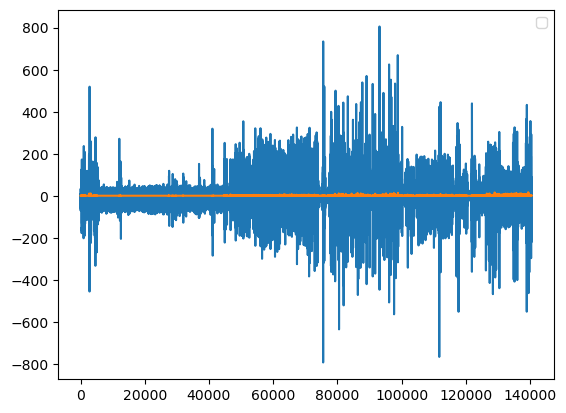

In [ ]:
data_path = "C:/Users/cleme/ETH/Master/Thesis/data/euler"
np_data = np.load(data_path + "/dalia_preprocessed/S1.npz")

def scale()

series = np_data['bvp'][:, 0]
series = scale(series)

activity = resample(np_data['wrist_acc'], len(np_data['bvp']))
activity = activity[:,0]**2 + activity[:, 1]**2 + activity[:,2]**2

highest_activity = np.argmax(activity)
lower = min(highest_activity-1000,0)
upper = min(highest_activity+1000,len(np_data['bvp']))
serie = pd.Series(np_data['bvp'][lower: upper,0])
serie.plot()
activity = pd.Series(activity[lower:upper])
activity.plot()
plt.legend()

<Axes: >

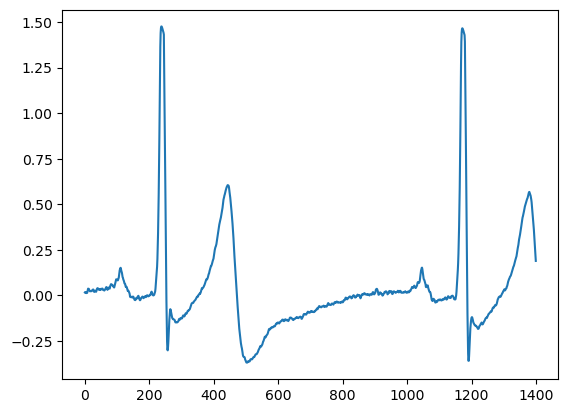

In [63]:
pd.Series(data['signal']['chest']['ECG'][:1400][:,0]).plot()

In [ ]:
data['signal']['wrist']['BVP']

(589568, 1)

# UCIHAR Dataset

In [35]:
datadir = "C:/Users/cleme/ETH/Master/Thesis/data/UCIHAR/UCI HAR Dataset/UCI HAR Dataset/test/"
x_train = np.loadtxt(datadir  + "X_test.txt")
y_train = np.loadtxt(datadir + "y_test.txt")
subjects = np.loadtxt(datadir + "subject_test.txt")

In [39]:
pd.Series(subjects, dtype=int).unique()

array([ 2,  4,  9, 10, 12, 13, 18, 20, 24])

In [ ]:
body_acc_x = np.loadtxt(datadir + "Inertial Signals/body_acc_x_train.txt")

(7352, 128)

In [14]:
print(x_train.shape)

(7352, 561)


In [19]:
pd.Series(subjects).unique()

array([ 1.,  3.,  5.,  6.,  7.,  8., 11., 14., 15., 16., 17., 19., 21.,
       22., 23., 25., 26., 27., 28., 29., 30.])

# USC Dataset

In [67]:

datadir = "C:/Users/cleme/ETH/Master/Thesis/data/USC/USC-HAD/"
file_dir = datadir + "Subject1/a1t1.mat"
data = loadmat(file_dir)


In [71]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Sun Oct 17 17:39:12 2010',
 '__version__': '1.0',
 '__globals__': [],
 'title': array(['USC Human Motion Dataset'], dtype='<U24'),
 'version': array(['1.0'], dtype='<U3'),
 'date': array(['Oct-2010'], dtype='<U8'),
 'subject': array(['1'], dtype='<U1'),
 'age': array(['27'], dtype='<U2'),
 'height': array(['164cm'], dtype='<U5'),
 'weight': array(['43kg'], dtype='<U4'),
 'activity': array(['walking-forward'], dtype='<U15'),
 'activity_number': array(['1'], dtype='<U1'),
 'trial': array(['1'], dtype='<U1'),
 'sensor_location': array(['front-right-hip'], dtype='<U15'),
 'sensor_orientation': array(['x-gravity-y-walking-direction-z-vertical-to-walking-direction'],
       dtype='<U61'),
 'sensor_readings': array([[ 1.16277993e+00, -1.89287394e-01, -2.95780540e-01,
         -1.87813244e+01,  3.36187220e+00, -1.68631287e+01],
        [ 1.03229570e+00, -2.00144812e-01, -3.76303941e-01,
         -1.35445089e+01,  5.77886438e+00

# Capture 24

In [73]:
datadir = "C:/Users/cleme/ETH/Master/Thesis/data/Capture24/capture24/"
df = pd.read_csv(datadir + "P001.csv")
df

C:\Users\cleme\AppData\Local\Temp\ipykernel_22704\1724369356.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(datadir + "P001.csv")


,time,x,y,z,annotation
0,2016-11-13 02:18:00.000000,-0.466690,-0.533341,0.658472,7030 sleeping;MET 0.95
1,2016-11-13 02:18:00.010000,-0.466690,-0.533341,0.658472,7030 sleeping;MET 0.95
2,2016-11-13 02:18:00.020000,-0.466690,-0.533341,0.658472,7030 sleeping;MET 0.95
3,2016-11-13 02:18:00.030000,-0.466690,-0.533341,0.658472,7030 sleeping;MET 0.95
4,2016-11-13 02:18:00.040000,-0.466690,-0.533341,0.658472,7030 sleeping;MET 0.95
...,...,...,...,...,...
10019996,2016-11-14 06:07:59.960000,0.049416,-0.797846,0.565700,7030 sleeping;MET 0.95
10019997,2016-11-14 06:07:59.970000,0.049416,-0.782285,0.565700,7030 sleeping;MET 0.95
10019998,2016-11-14 06:07:59.980000,0.049416,-0.782285,0.565700,7030 sleeping;MET 0.95
10019999,2016-11-14 06:07:59.990000,0.049416,-0.782285,0.565700,7030 sleeping;MET 0.95


In [78]:


# Assume your DataFrame is called df and has a column "annotation"
df['met'] = df['annotation'].str.extract(r'([0-9]*\.?[0-9]+)$').astype(float)
df

,time,x,y,z,annotation,met
0,2016-11-13 02:18:00.000000,-0.466690,-0.533341,0.658472,7030 sleeping;MET 0.95,0.95
1,2016-11-13 02:18:00.010000,-0.466690,-0.533341,0.658472,7030 sleeping;MET 0.95,0.95
2,2016-11-13 02:18:00.020000,-0.466690,-0.533341,0.658472,7030 sleeping;MET 0.95,0.95
3,2016-11-13 02:18:00.030000,-0.466690,-0.533341,0.658472,7030 sleeping;MET 0.95,0.95
4,2016-11-13 02:18:00.040000,-0.466690,-0.533341,0.658472,7030 sleeping;MET 0.95,0.95
...,...,...,...,...,...,...
10019996,2016-11-14 06:07:59.960000,0.049416,-0.797846,0.565700,7030 sleeping;MET 0.95,0.95
10019997,2016-11-14 06:07:59.970000,0.049416,-0.782285,0.565700,7030 sleeping;MET 0.95,0.95
10019998,2016-11-14 06:07:59.980000,0.049416,-0.782285,0.565700,7030 sleeping;MET 0.95,0.95
10019999,2016-11-14 06:07:59.990000,0.049416,-0.782285,0.565700,7030 sleeping;MET 0.95,0.95


In [79]:
df['met'] = df['annotation'].str.split().str[-1].astype(float)


In [85]:
type(df.drop(["time", "annotation"], axis=1).values)

numpy.ndarray

# WildPPG

In [63]:
datadir = "C:/Users/cleme/ETH/Master/Thesis/data/WildPPG/data/"
file_path = datadir + "WildPPG_Part_an0.mat"
data = loadmat(file_path)

In [64]:
data['wrist']

array([[(array([[(array([[128]]), array(['x-axis of MEMS accelerometer'], dtype='<U28'), array([[0.08556089, 0.13363654, 0.1945609 , ..., 0.92      , 0.92      ,
                        0.93173379]]))                                                                                                                          ]],
              dtype=[('fs', 'O'), ('descr', 'O'), ('v', 'O')]), array([[(array([[128]]), array(['y-axis of MEMS accelerometer'], dtype='<U28'), array([[0.61356089, 0.69048525, 0.75827308, ..., 0.088     , 0.07246758,
                        0.08373379]]))                                                                                                                          ]],
              dtype=[('fs', 'O'), ('descr', 'O'), ('v', 'O')]), array([[(array([[128]]), array(['z-axis of MEMS accelerometer'], dtype='<U28'), array([[ 0.02928782,  0.00236346,  0.0054391 , ..., -0.22873379,
                        -0.23953242, -0.24426621]]))                                

In [52]:
print(data['wrist']['ppg_g'][0][0][0]['v'][0].shape)
print(data['wrist']['ppg_r'][0][0][0]['v'][0].shape)
print(data['wrist']['ppg_ir'][0][0][0]['v'][0].shape)

(1, 5679104)
(1, 5679104)
(1, 5679104)


In [5]:
from pathlib import Path 
datadir = Path(datadir)
lengths = []
for path in datadir.glob('*.mat'):
    data = loadmat(path)
    lengths.append(data['wrist']['acc_x'][0][0][0][0][2].shape[1])
    del data

In [ ]:
lengths

[5679104,
 5690368,
 6162432,
 7018496,
 6169600,
 6137856,
 6103040,
 6768640,
 6664192,
 5762048,
 6066176,
 5835776,
 6633472,
 6691840,
 6107136,
 6405120]

In [14]:
names = []
for path in datadir.glob("*.mat"):
    names.append(str(path).split("_")[-1][:3])
names

['an0',
 'e61',
 'fex',
 'k2s',
 'kjd',
 'l38',
 'n31',
 'ngh',
 'p5d',
 'p9p',
 'qm9',
 'ssx',
 'trh',
 'tz8',
 'u7y',
 'w4p']

# IEEE Dataset

In [74]:
datadir = "C:/Users/cleme/ETH/Master/Thesis/data/IEEEPPG/"
file_path = datadir + "IEEE_Big.mat"
data = loadmat(file_path)

In [101]:
data['whole_dataset'][5][1].shape

(157, 1)

# Chapman 

In [2]:
datadir = "C:/Users/cleme/ETH/Master/Thesis/data/Chapman/"
data = loadmat(datadir + "chapman.mat")


In [15]:
data['whole_data'].shape

(10597, 2)

(array([2225.,    0.,    0., 2659.,    0.,    0., 3888.,    0.,    0.,
        1825.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

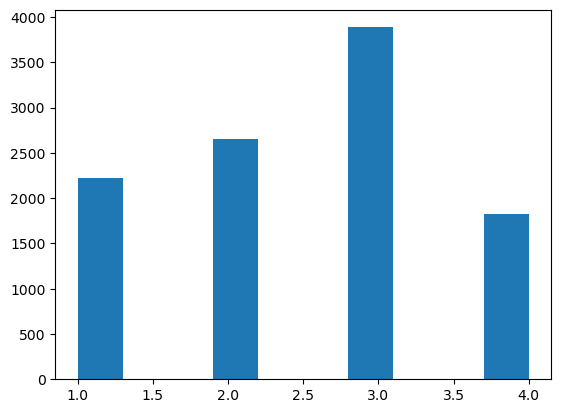

In [27]:
df = pd.DataFrame(data['whole_data'])[1].apply(lambda x: x[0][0])
plt.hist(df.values)